In [1]:
import pandas as pd
df = pd.read_pickle('data/visits.pkl')

In [2]:
def create_list(row):
    if row:
        if row['savedCalls']:
            return row['savedCalls']
    return [{}]

df_exploded = df.copy()
df_exploded['apis'] = df_exploded['apis'].map(lambda x: create_list(x))
df_exploded = df_exploded.explode('apis')

df_filtered = df_exploded.drop(['finalUrl', 'cmps', 'requests', 'cookies', 'targets'], axis=1)

display(df_filtered)

,initialUrl,apis,autoconsent_action
0,http://tradplusad.com/,{},optIn
1,http://alexa.com/,{},optIn
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
...,...,...,...
7593,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut
7593,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut
7594,http://sothebys.com/,{},optOut
7595,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut


In [3]:
df_object_types = df_filtered.copy()

object_types = [
    '[object Blob]',
    '[object FormData]',
    '[object Object]',
    '[object SVGSVGElement]',
    '[object SVGPathElement]',
    '[object HTMLSpanElement]',
    '[object HTMLButtonElement]',
    '[object SVGPathElement]',
    '[object HTMLDivElement]',
    '[object HTMLImageElement]',
    '[object Text]',
    '[object HTMLLIElement]',
    '[object HTMLUListElement]',
    '[object HTMLHeadingElement]',
    '[object HTMLParagraphElement]',
    '[object HTMLIFrameElement]',
    '[object HTMLInputElement]',
    '[object HTMLScriptElement]',
    '[object HTMLLinkElement]',
    '[object HTMLMetaElement]',
    '[object HTMLElement]',
    '[object HTMLStyleElement]',
    '[object HTMLObjectElement]',
    '[object HTMLHeadElement]',
    '[object CustomEvent]',
    '[object Comment]',
    '[object HTMLFieldSetElement]',
    '[object HTMLTrackElement]',
    '[object HTMLOptionElement]',
    '[object HTMLVideoElement]',
    '[object DocumentFragment]',
    '[object HTMLTableElement]',
    '[object HTMLTableRowElement]',
    '[object HTMLSourceElement]',
    '[object HTMLPictureElement]',
    '[object HTMLBodyElement]',
    ]

def argument_contains(row, object_string):
    if row['apis'] == {}:
        return False
    arguments = row['apis']['arguments']
    for argument in arguments:
        if argument == object_string:
            return True
    return False

for object_type in object_types:
    df_object_types[object_type] = df_object_types.apply(lambda x: argument_contains(x, object_type), axis=1)

display(df_object_types)

,initialUrl,apis,autoconsent_action,[object Blob],[object FormData],[object Object],[object SVGSVGElement],[object SVGPathElement],[object HTMLSpanElement],[object HTMLButtonElement],...,[object HTMLFieldSetElement],[object HTMLTrackElement],[object HTMLOptionElement],[object HTMLVideoElement],[object DocumentFragment],[object HTMLTableElement],[object HTMLTableRowElement],[object HTMLSourceElement],[object HTMLPictureElement],[object HTMLBodyElement]
0,http://tradplusad.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,http://alexa.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7593,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7594,http://sothebys.com/,{},optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7595,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
counts_optIn = []
counts_optOut = []

for object_type in object_types:
    counts_optIn.append(df_object_types[df_object_types['autoconsent_action'] == 'optIn'][object_type].values.sum())
    counts_optOut.append(df_object_types[df_object_types['autoconsent_action'] == 'optOut'][object_type].values.sum())

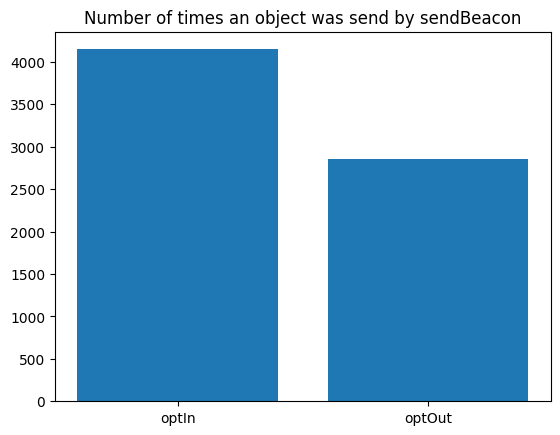

In [5]:
import matplotlib.pyplot as plt
import numpy as np

sums = [sum(counts_optIn), sum(counts_optOut)]
labels = ['optIn', 'optOut']
plt.bar(labels, sums)
plt.title("Number of times an object was send by sendBeacon")
plt.show()

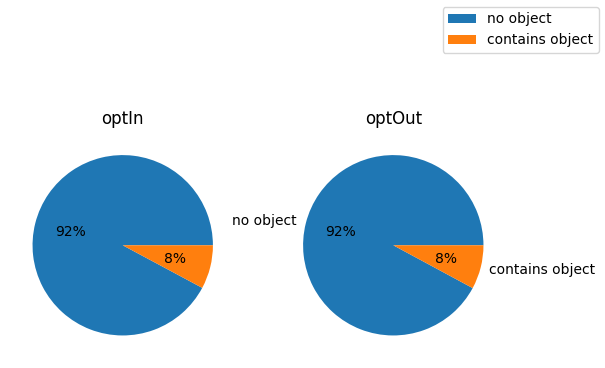

In [6]:
count_optIn = len(df_object_types[df_object_types['autoconsent_action'] == 'optIn'])
count_optOut = len(df_object_types[df_object_types['autoconsent_action'] == 'optOut'])
labels = ['optIn', 'optOut', 'object optIn', 'object optOut']
values = [count_optIn, count_optOut] + sums

fig, ax = plt.subplots(1, 2)
ax[0].pie([count_optIn, sum(counts_optIn)], autopct='%.0f%%')
ax[0].set_title("optIn")
ax[1].pie([count_optOut, sum(counts_optOut)], autopct='%.0f%%', labels=['no object', 'contains object'])
ax[1].set_title("optOut")
fig.legend()
plt.show()


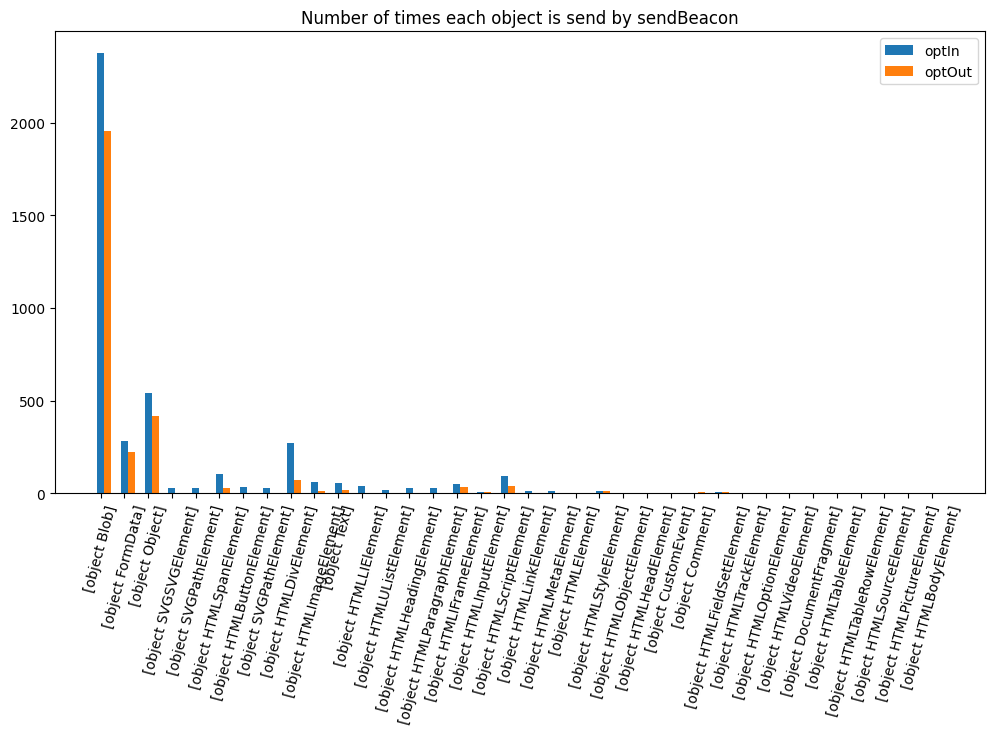

In [7]:
labels = [l[1:-1] for l in object_types]
ind = np.arange(len(object_types))
width = 0.3

plt.figure(figsize=(12,6))
plt.title("Number of times each object is send by sendBeacon")
plt.xticks(ind + width/2, object_types, rotation=75)
plt.bar(ind, counts_optIn, width, align='edge', data='height', label='optIn')
plt.bar(ind+width, counts_optOut, width, align='edge', data='height', label='optOut')
plt.legend()
plt.show()